In [1]:
# import chess
import chess.svg
import time 
import log
import minimax
from treelib import Node, Tree
from IPython.display import SVG, display,HTML,clear_output

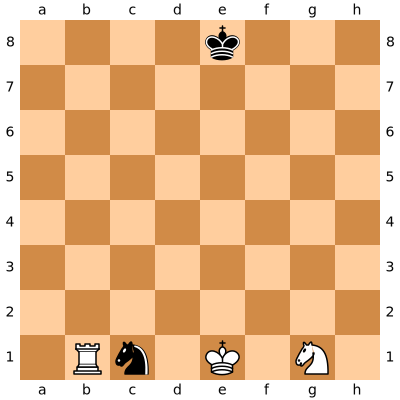

WAITING for player to make move....


KeyboardInterrupt: 

In [2]:
board = chess.Board() 
# default 
playerType = 'X'
player = ''
white = True
currentPiecePositions = {'n':chess.B8,'r':chess.E8,'K':chess.E1,'R':chess.A1,'N':chess.G1}
def setPieces(board,white):
    board.clear_board()
    board.set_piece_at(chess.E1,chess.Piece(chess.KING,True))
    board.set_piece_at(chess.A1,chess.Piece(chess.ROOK,True))
    board.set_piece_at(chess.G1,chess.Piece(chess.KNIGHT,True) )
    board.set_piece_at(chess.E8,chess.Piece(chess.KING, False))
    board.set_piece_at(chess.B8,chess.Piece(chess.KNIGHT,False))
def getSquareIndexByString(str):
    index = 0
    for val in chess.SQUARE_NAMES:
        if val == str:
            return index
        index = index+1
    return -1
def displayBoard(board):
    clear_output()
    boardImage = chess.svg.board(board)
    display(SVG(boardImage))
def getMovesByLineString(line):
    splitLine = line.split(':')
    moves = {'move': splitLine[2].strip()}
    # get the index value for the square
    moves['squareIndex'] = getSquareIndexByString(moves['move'])
    if(playerType == 'X'):
        moves['piece'] = splitLine[1].lower()
    else:
        moves['piece'] = splitLine[1]
    moves['pieceObject'] = chess.Piece.from_symbol(moves['piece'])
    return moves
def MakeMyMove(turn):
    tree = minimax.miniMaxTree(board)
    for node in tree.children('currentBoard'):
        brd = node.data
        break
    move = brd.peek()
    board.push(move)
    newSquare = str(move.uci()[2:4].strip())
    piece = str(board.piece_at(getSquareIndexByString(newSquare)))
    
    displayBoard(board)
    # Let's say move was KING 
#     piece = chess.Piece(chess.KNIGHT,False).symbol()
    if (playerType == 'X'):
        piece = piece.capitalize()
    else:
        piece = piece.lower()
#     movePiece = chess.Move(currentPiecePositions[piece],chess.H3)
#     move = "h3"
#     if (movePiece in board.pseudo_legal_moves):
#         board.push(movePiece)
#         currentPiecePositions[piece] = getSquareIndexByString(move)
    #displayBoard(board)
    player.write(turn,str(piece).capitalize(),newSquare)

playerType = input("Player? (x or y)")
playerType = playerType.capitalize()
if (playerType == 'X'):
    player = log.FileHandler('X')
    setPieces(board,white)  
else:
    player = log.FileHandler('Y')
    setPieces(board,not white)  
# turns
turn = 1

if (playerType == 'X'):
    MakeMyMove(turn)
    turn = turn+1
while(turn < 100):
    print("WAITING for player to make move....")
    while(True):
        wait = player.waitOpponent()
        if wait:
            pass
        else:
            break 
    # Now it's other player's turn
    m = player.getPreviousMove()
    playerMoves = getMovesByLineString(m)
    movePiece = chess.Move(currentPiecePositions[playerMoves['piece']],playerMoves['squareIndex'])
    board.push(movePiece)
    currentPiecePositions[playerMoves['piece']] = getSquareIndexByString(playerMoves['move'])
    turn=turn+1
    MakeMyMove(turn)
    turn = turn+1
